In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the dataset
data=pd.read_csv("../../../Datasets/Project_practice/diabetes.csv")


In [3]:
#printing the first 5 rows of dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Number of rows and number of columns in dataset
data.shape

(768, 9)

In [5]:
#getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# check if any null value is present
data.isnull().values.any()

False

In [9]:
#taking care of duplicate values
data_dup=data.duplicated().any()

In [10]:
data_dup

False

#### 0 --> Non-Diabetec
#### 1 --> Diabetec

In [11]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
#seperating the data and labels i.e. dependent and independents variables
X= data.drop(columns="Outcome", axis=1)
y=data["Outcome"]

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler

### Data Standardization

In [16]:
scaler= StandardScaler()
scaler.fit(X)
Standardized_data=scaler.transform(X)

In [17]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [18]:
X=Standardized_data
y=data['Outcome']

### Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y, test_size=0.2,random_state=1)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the model

### Logistic Regression¶

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [24]:
y_pred1=log.predict(X_test)

In [25]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(Y_test,y_pred1)

0.7792207792207793

### SVC

In [28]:
from sklearn.svm import SVC

In [29]:
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [30]:
y_pred2=svc.predict(X_test)

In [31]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [32]:
accuracy_score(Y_test,y_pred2)

0.8051948051948052

### KNeighbors Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
y_pred3=knn.predict(X_test)

In [36]:
y_pred3

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [37]:
accuracy_score(Y_test,y_pred3)

0.8051948051948052

## Non-Linear Machine Learning Algorithms

In [38]:
data=pd.read_csv("../../../Datasets/Project_practice/diabetes.csv")

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
data=data.drop_duplicates()

In [41]:
data.shape

(768, 9)

In [42]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred4=dt.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred4)

0.7467532467532467

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier()

In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred5=rf.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred5)

0.7467532467532467

### Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gb=GradientBoostingClassifier()

In [55]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [56]:
y_pred6=gb.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred6)

0.7467532467532467

In [58]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'], 'Acc':[accuracy_score(Y_test,y_pred1),
                                                                           accuracy_score(Y_test,y_pred2),
                                                                           accuracy_score(Y_test,y_pred3),
                                                                           accuracy_score(y_test,y_pred4),
                                                                           accuracy_score(y_test,y_pred5),
                                                                           accuracy_score(y_test,y_pred6)]})

In [59]:
final_data

,Models,Acc
0,LR,0.779221
1,SVM,0.805195
2,KNN,0.805195
3,DT,0.746753
4,RF,0.746753
5,GB,0.746753


In [60]:
import seaborn as sns

C:\Users\dnyan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Acc'>

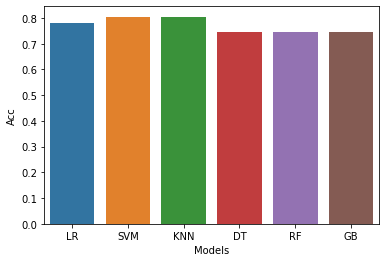

In [61]:
sns.barplot(final_data['Models'],final_data['Acc'])

In [62]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [63]:
X.shape

(768, 8)

In [64]:
scaler= StandardScaler()
scaler.fit(X)
Standardized_data=scaler.transform(X)

In [65]:
X=Standardized_data
y=data['Outcome']

In [66]:
X.shape

(768, 8)

In [67]:
from sklearn.svm import SVC

In [68]:
svc=SVC()
svc.fit(X,y)

SVC()

In [69]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


### Prediction on new data

In [71]:
import pandas as pd

In [72]:
new_data=pd.DataFrame({'Pregnancies':5,
                       'Glucose':166,
                       'BloodPressure':72,
                       'SkinThickness':19,
                       'Insulin':175,
                       'BMI':25.8,
                       'DiabetesPedigreeFunction':0.587,
                       'Age':51,},index=[0])

In [73]:
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,5,166,72,19,175,25.8,0.587,51


In [74]:
new_data=scaler.transform(new_data)

In [75]:
QP=svc.predict(new_data)
if QP[0]==1:
    print('Diabetic')
else:
    print('No Diabetic')

Diabetic


In [76]:
svc.predict(new_data)

array([1], dtype=int64)

### Save the model to reuse it again

In [77]:
import pickle

In [78]:
pickle.dump(svc,open('diabetes_prediction_model.pkl','wb'))

In [79]:
heart_Pre=pickle.load(open('diabetes_prediction_model.pkl','rb'))